In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the data
spending_data = pd.read_csv('spending.csv')

# Clean the data
spending_data = spending_data.dropna()
spending_data['date'] = pd.to_datetime(spending_data['date'], format='%d-%m-%Y')

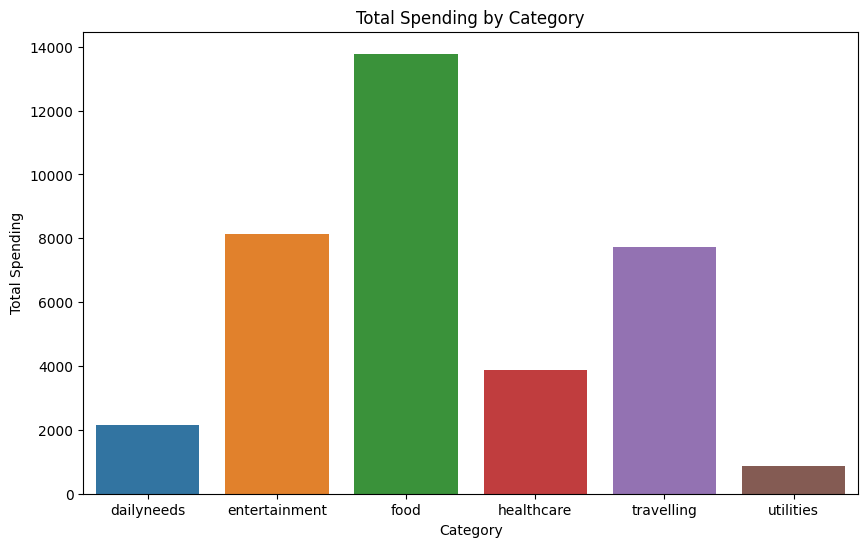

In [43]:
# Calculate total spending by category
category_spending = spending_data.groupby('category')['amount'].sum().reset_index()

# Bar chart of total spending by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='amount', data=category_spending)
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.show()

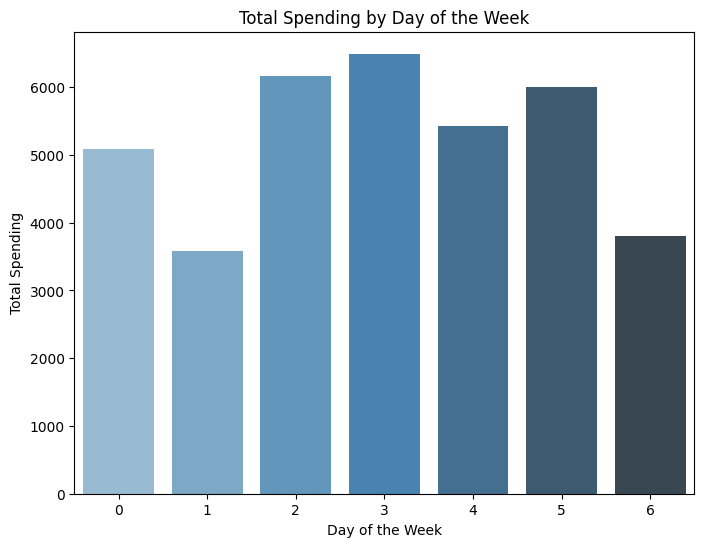

In [44]:
# Analyze spending by day of the week
spending_data['Day_of_week'] = spending_data['date'].dt.dayofweek
day_of_week_spending = spending_data.groupby('Day_of_week')['amount'].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=day_of_week_spending.index, y=day_of_week_spending.values, palette='Blues_d')
plt.title('Total Spending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Spending')
plt.show()


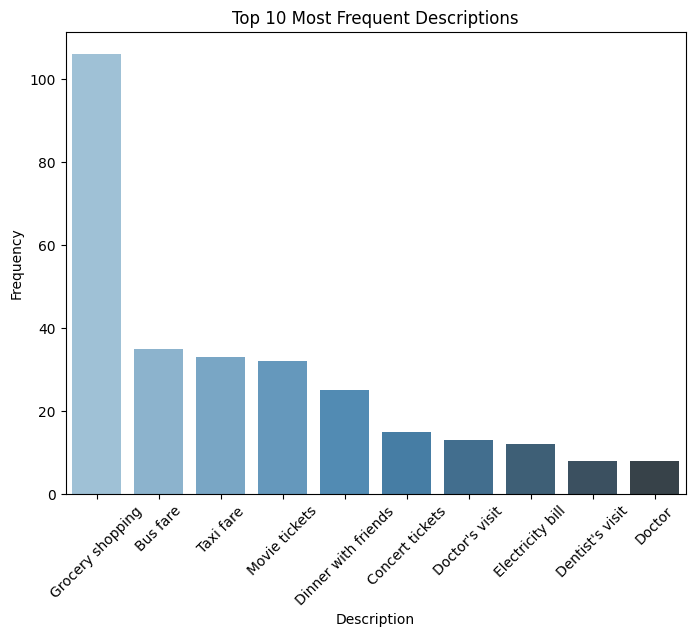

In [45]:
# Analyze spending by description
top_descriptions = spending_data['description'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_descriptions.index, y=top_descriptions.values, palette='Blues_d')
plt.title('Top 10 Most Frequent Descriptions')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Conduct a t-test to compare spending on weekdays vs weekends
weekday_spending = spending_data.loc[spending_data['Day_of_week'] < 5]['amount']
weekend_spending = spending_data.loc[spending_data['Day_of_week'] >= 5]['amount']
t, p = ttest_ind(weekday_spending, weekend_spending, equal_var=False)
print('T-test results: t = {:.2f}, p = {:.4f}'.format(t, p))
if p < 0.05:
    print('There is a significant difference in spending between weekdays and weekends.')
else:
    print('There is no significant difference in spending between weekdays and weekends')

T-test results: t = 0.38, p = 0.7077
There is no significant difference in spending between weekdays and weekends


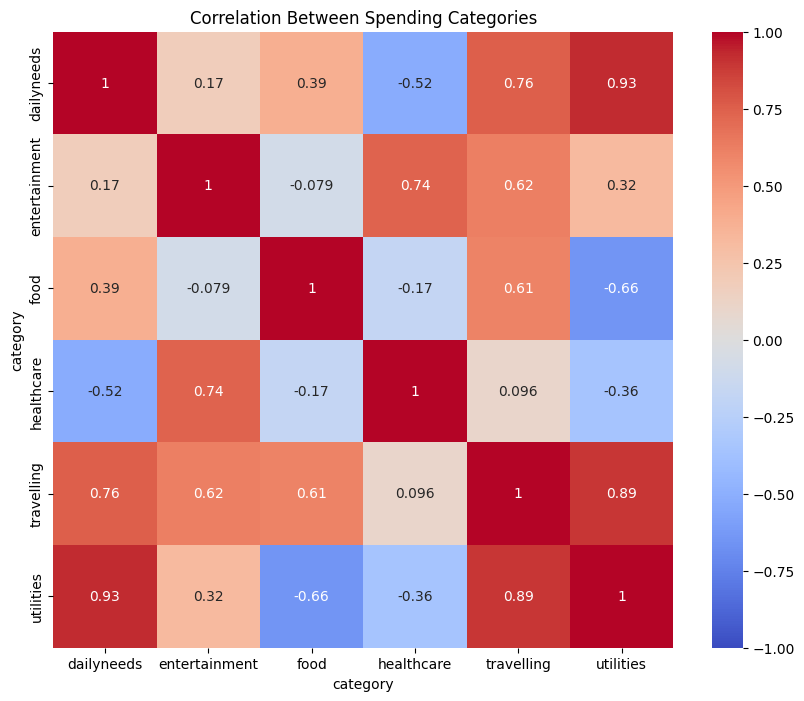

In [47]:
# Convert date column to datetime format and set it as the index
spending_data['date'] = pd.to_datetime(spending_data['date'])
spending_data.set_index('date', inplace=True)

# Create a pivot table to aggregate the spending by category and month
pivot_table = spending_data.pivot_table(index=pd.Grouper(freq='M'), columns='category', values='amount', aggfunc='sum')

# Compute the correlation matrix between categories
corr_matrix = pivot_table.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Spending Categories')
plt.show()

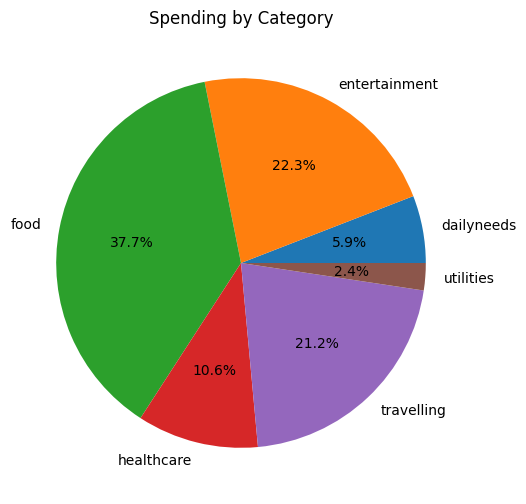

In [49]:
# Pie chart of spending by category
plt.figure(figsize=(10, 6))
plt.pie(category_spending['amount'], labels=category_spending['category'], autopct='%1.1f%%')
plt.title('Spending by Category')
plt.show()

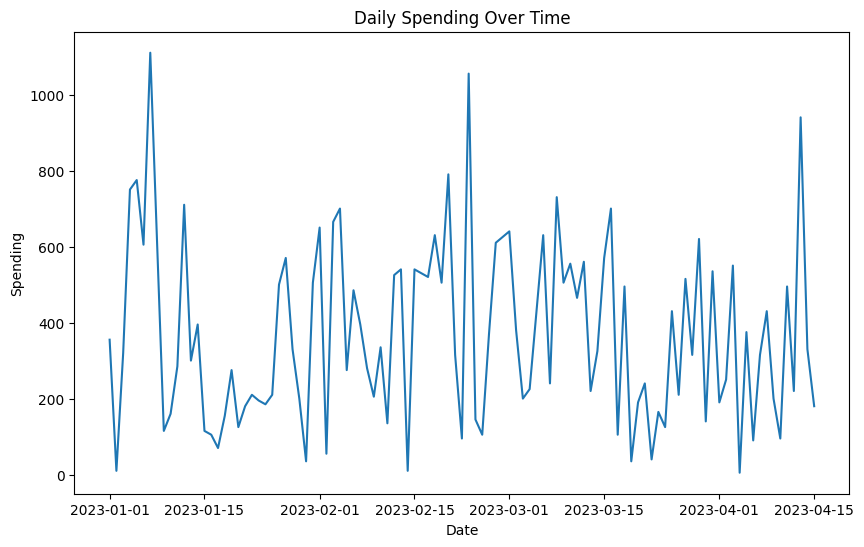

In [50]:
# Line chart of daily spending over time
daily_spending = spending_data.groupby('date')['amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='amount', data=daily_spending)
plt.title('Daily Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Spending')
plt.show()

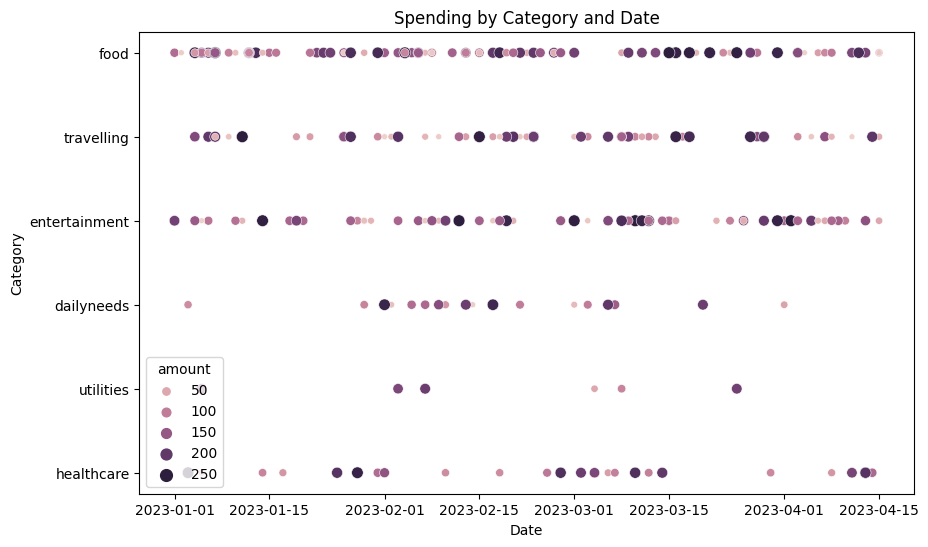

In [51]:
# Scatter plot of spending by category and date
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date', y='category', hue='amount', size='amount', data=spending_data)
plt.title('Spending by Category and Date')
plt.xlabel('Date')
plt.ylabel('Category')
plt.show()